<a href="https://colab.research.google.com/github/max-barker/AINT515/blob/main/Labs/Practical%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical 03: Hough Lines**

---
**Introduction**

Hough line detection is a commonly used algorithm for finding lines of pixels in an image, even if they are broken in places or slightly distorted.

To understand how it achieves this, we first have to go over polar representation of lines. Any infinite line in 2D space can be represented with two numbers. its perpendicular distance from the origin (rho), and its angle (theta):



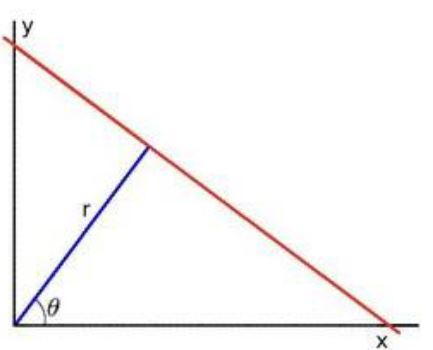

The hough transform goes from pixel to pixel. If the current pixel is white, it considers all lines that could intersect with this pixel. Plotting all these rho and theta values for these lines looks like so: 

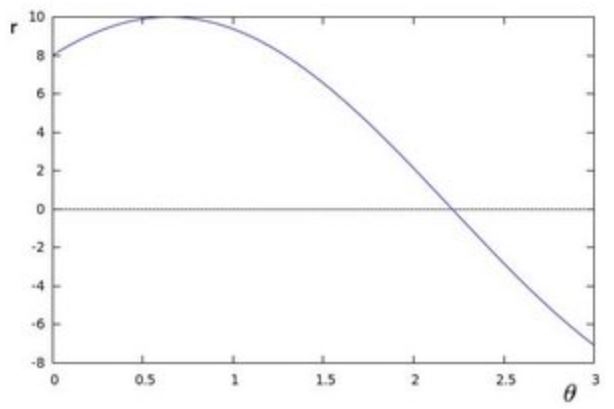

The plot above is every possible line that this pixel could be a part of, which isnt much to go on. But if this is done for a few more pixels, there may be a common intersection point. This interesection states that all three pixels share one line that they could be a part of:

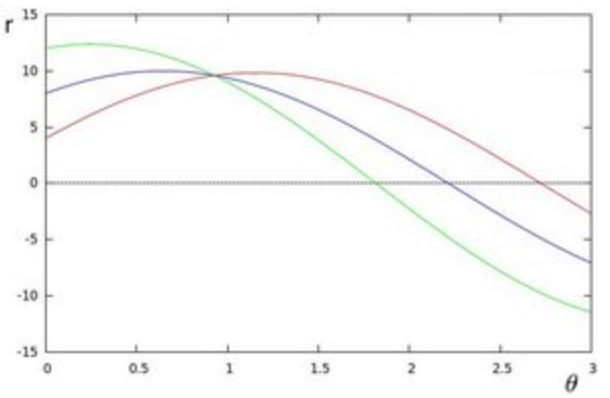

If this is done for the whole image, you get a plot like the one below. As you can see, there are two bright spots. Each bright spot represents 100's of pixels lining up with each other, therefore from this plot we can conclude that the original image has two lines present (with rho and theta values located at the bright spots).

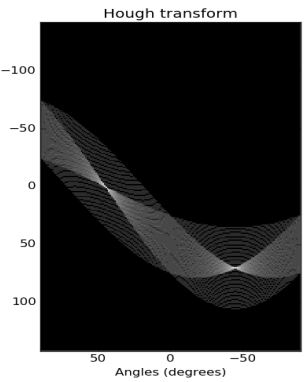

# **Implementation**

---
Luckily, OpenCV has a hough lines function built in. But it's still important to understand the underlaying math that drives this algorithm. As before, run the code below to load in the practical's dependencies:


In [ ]:
import cv2 as cv   #opencv itself (under the name cv)
import numpy as np #numpy math library (under the name np)
import math

#image displaying libraries
import pylab       
from matplotlib import pyplot as plt 

#make generated images appear inline below the code
%matplotlib inline 

#set the displayed image size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 

# Download example images
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/9652170d69207e4f9c9e67e1c06842c8a59178fc/AINT515/Practical03/Hough-Lines-1.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/9652170d69207e4f9c9e67e1c06842c8a59178fc/AINT515/Practical03/Hough-Lines-2.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/9652170d69207e4f9c9e67e1c06842c8a59178fc/AINT515/Practical03/Hough-Lines-3.jpg

Load in a sample image, there are three to pick from so feel free to try them out

In [ ]:
input_image=cv.imread('Hough-Lines-1.jpg')                    #import the image as a Mat
input_image_RGB = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)  #convert the image to an RGB format so it can be displayed correctly
plt.imshow(input_image_RGB)                                   #plot the image

Before lines can be detected, an edge detector is needed. This removes all information about colour and texture, leaving just edges behind. There are many ways to do this, but in this practical we are using the [Canny](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html) algorithm. Try different threshold values to see how it changes the output.

In [ ]:
#Sets the sensitivity of the line detection 
cannyThreshold=50  

#Apply edge detection
input_image_canny=cv.Canny(input_image_RGB,cannyThreshold,cannyThreshold*2)

#Display the result
plt.imshow(input_image_canny)  

Hough line detection needs a few parameters defined:

*   Rho and Theta resolution: Sets the size of the hough transform space.
*   Line Threshold: Sets the sensitivity of the line detection.

You only really need to adjust the threshold get the result you want.

The next step is to draw the detected lines back onto the image to visualise  them. This is tricky since the lines are in the polar form and OpenCV drawing functions require coordinates. So a maths step is needed to convert between one form and the other

finally, using the "line()" function, the detected lines are drawn to the original image. This function simply draws a coloured line between two points on a target image.

In [ ]:
rhoResolution = 1           #Rho values are rounded to the nearest 1
thetaResolution = np.pi/180 #Theta values are rounded to the nearest degree (in radians)
lineThreshold = 150         #How many pixels in a row are needed to detect a line

#run line detection
lines = cv.HoughLines(input_image_canny, rhoResolution, thetaResolution, lineThreshold)

#copy the orginal image that we can draw on
input_image_output = np.copy(input_image_RGB)

if lines is not None:            #Check if any lines have been detected
  for i in range(0, len(lines)): #If so, then loop though all the lines and draw them one by one

    #Math to convert polar coordinates, into two cartesian coordinates
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 10000*(-b)), int(y0 + 10000*(a)))
    pt2 = (int(x0 - 10000*(-b)), int(y0 - 10000*(a)))

    #Draw the two points as a blue line on the output image
    cv.line(input_image_output, pt1, pt2, (0,0,255),2)

#display the result
plt.imshow(input_image_output)  

Try running the code for the three different sample images. How do the different parameters affect the result? What parameters are needed to get a desirable result in all three images.


# **Probabilistic Hough Lines**

---

OpenCV includes an extension to the classic hough lines algorithm, which is probabilistic hough lines. This functions similarly to the one above, but also tries to determine where the lines start and end. It tends to be more noisy than the standard hough lines function, so it depends on your use case which is more useful.

As before, the following code loads in an image and applies a canny edge detection:



In [ ]:
input_image=cv.imread('Hough-Lines-1.jpg')                    #import the image as a Mat
input_image_RGB = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)  #convert the image to an RGB format so it can be displayed correctly
plt.imshow(input_image_RGB)                                   #plot the image

In [ ]:
#Sets the sensitivity of the line detection 
cannyThreshold=50  

#Apply edge detection
input_image_canny=cv.Canny(input_image_RGB,cannyThreshold,cannyThreshold*2)

#Display the result
plt.imshow(input_image_canny) 

HoughLinesP is used in mostly the same way as HoughLines bar a few changes. Firstly there are two more parameters:

*   **minLength:** The minimum size a detected line can be. Good for filtering out small unwanted lines.
*   **maxGap:** The biggest gap that can exist on a line, before it is split into two lines.

The output is also different. Instead of storing the rho and theta values, it stores the coordinates of the two end points in the format (x1, y1, x2, y2). This also makes it a lot easier to plot compared with the classical algorithm.


In [ ]:
rhoResolution = 1           #Rho values are rounded to the nearest 1
thetaResolution = np.pi/180 #Theta values are rounded to the nearest degree (in radians)
lineThreshold = 100         #How many pixels in a row are needed to detect a line
minLength=50                #All lines smaller than this are discarded
maxGap=20                   #A gap in a line larger than this will split it into two lines

#run line detection
linesP = cv.HoughLinesP(input_image_canny, rhoResolution, thetaResolution, lineThreshold, None, minLength, maxGap)

#copy the orginal image that we can draw on
input_image_output = np.copy(input_image_RGB)

if linesP is not None:            #Check if any lines have been detected
  for i in range(0, len(linesP)): #If so, then loop though all the lines and draw them one by one
    #Draw the two points as a green line on the output image
    l = linesP[i][0]
    cv.line(input_image_output, (l[0], l[1]), (l[2], l[3]), (0,255,0), 2)

#display the result
plt.imshow(input_image_output)  

Again, try tuning this algorithm for the three sample images. What are the trade offs between the classical and probabilistic variant? Where would one be more useful over the other one?